Packet rate analysis + signal strengths plotting

In [1]:

#reading from raw data
import fileinput
import json 
json_lines_raw = []
for line in fileinput.input(["F:/ArenaData/arena_raw_data/2015-07-05.json/2015-07-05_raw.json"]):
    jsline = json.loads(line)
    data = []
    data.append(jsline["value"]["sourceMac"])
    data.append(jsline["value"]["localMac"])
    data.append(jsline["measurementTimestamp"])
    data.append(jsline["value"]["droneId"])
    data.append(jsline["value"]["signal"])
    json_lines_raw.append(data)
print(json_lines_raw[0])
              

['32bf72d3-d707-4c37-b9b5-6318187de63f', 0, 1436047299132, '107', -68]


In [2]:
localMac = dict()
for line in json_lines_raw:
    localMac[line[0]] = line[1]
    

Finding the most overloaded drone (112)

In [3]:
numberOfMeasurementsForDrone = dict()
for line in json_lines_raw:
    droneId = line[3]
    if droneId not in numberOfMeasurementsForDrone.keys():
        numberOfMeasurementsForDrone[droneId] = 0
    numberOfMeasurementsForDrone[droneId] +=1    
maxMeasurements = 0

maxDroneId = 0
for droneId in numberOfMeasurementsForDrone.keys():
    if numberOfMeasurementsForDrone[droneId] > maxMeasurements:
        maxMeasurements = numberOfMeasurementsForDrone[droneId]
        maxDroneId = droneId
print(maxDroneId)
print(maxMeasurements)

112
2920472


Computing the timestamps for every address visible at drone 112

In [4]:
timestamps112 = dict()
for line in json_lines_raw:
    if line[3]=="112":
        address = line[0]
        if address not in timestamps112.keys():
            timestamps112[address] = []        
        timestamps112[address].append(line[2])
for address in timestamps112.keys():
    timestamps112[address].sort()  

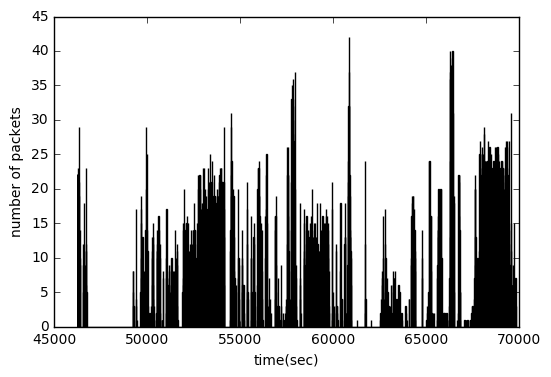

In [5]:
#plotting packet arrival rate at drone 112
import matplotlib.pyplot as plt
#myAddress = 'e1deda99-163f-4b68-9ade-e1f05d070bf2'#the largest one
myAddress = '8b8a2356-d11e-4bd5-bb35-d8370bf48b1e'#randomized
times112MyAddress = []
minTime = 1436047367297
for timestamp in timestamps112[myAddress]:
    time = (timestamp - minTime)/1000
    times112MyAddress.append(time)
plt.hist(times112MyAddress, bins = 2000)
plt.ylabel('number of packets')
plt.xlabel('time(sec)')
axes = plt.gca()
plt.show()


In [6]:
#computing the interarrival times for every address at drone 112
delays112 = dict()
for address in timestamps112.keys():
    if address not in delays112.keys():
        delays112[address] = []
    oldTimeStamp = 0        
    for timestamp in timestamps112[address]:
        if oldTimeStamp > 0:
            delay = (timestamp - oldTimeStamp)
            delays112[address].append(delay)
        oldTimeStamp = timestamp

In [7]:
#print(json_lines_raw[30000])
#print(len(delays))
address1 = '32bf72d3-d707-4c37-b9b5-6318187de63f'
address2 = '3be779a3-1e1a-4b79-8ad0-c555f5124e7c'

print(delays112[address1])
print(delays112[address2])

[44966, 35110, 33917, 173747, 2086, 3025, 305767, 98703, 499661, 725344, 547, 119, 18, 6197, 22, 43702, 82, 42, 80490, 72, 20, 8578, 35, 122, 99575, 42985, 41, 8266, 19, 21, 18147, 128512, 234440, 44, 63605, 27889, 281, 1436, 40, 3171, 2552, 123, 7874, 30318, 58317, 52725, 40006, 27463, 13650, 40, 17981, 33914, 82, 65825, 93, 389841, 83, 40, 129854, 129854, 433341, 2907, 7511, 71194, 22768, 118240, 11971, 10106, 119787, 138089, 454522, 62688, 1618, 22, 7998, 1223, 22, 89, 3833, 68559, 3248, 42, 19, 21, 573, 1549145, 40, 469, 531994, 3315042, 42, 1564348, 2216568, 125, 83]
[11642, 59388, 427802, 11896, 11845, 41, 12859, 35740, 17668, 50771, 224547, 7624, 45328, 30299, 12785, 21, 34805, 358229, 336466, 1087876, 4201, 458812, 21, 104735, 271604, 38809, 23, 624703, 19, 723127, 29117, 23, 3990, 19443, 12800, 12747, 51033, 32693, 277624, 6143, 3916, 3063, 537, 7377, 16165, 34792, 11946, 27, 40, 10836, 207, 2476, 19, 2656, 20796, 19, 23, 49490, 13577, 21, 68194, 119638, 6506, 13484, 9201, 284

In [8]:
#computing statistics of non-randomized addresses for drone 112 (most overloaded drone)
import numpy as np
averageDelay0_112= dict()
medianDelay0_112 = dict()
stderrDelay0_112 = dict()
for address in delays112.keys():
    if localMac[address] == 0:
        if address not in averageDelay0_112.keys():
            if len(delays112[address]) > 1:
                delaysArray = np.array(delays112[address])
                averageDelay0_112[address] = np.mean(delaysArray)
                medianDelay0_112[address] = np.median(delaysArray)
                stderrDelay0_112[address] = np.std(delaysArray)
                if len(delays112[address]) > 200:
                    print(address)
                if len(delays112[address])> 1000:    
                    print("long " +  address)
print('**********************************************************************')                
#computing statistics of randomized addresses for drone 112
averageDelay1_112= dict()
medianDelay1_112 = dict()
stderrDelay1_112 = dict()
for address in delays112.keys():
    if localMac[address] == 1:
        if address not in averageDelay0_112.keys():
            if len(delays112[address]) > 1:
                delaysArray = np.array(delays112[address])
                averageDelay1_112[address] = np.mean(delaysArray)
                medianDelay1_112[address] = np.median(delaysArray)
                stderrDelay1_112[address] = np.std(delaysArray)       
                if len(delays112[address]) > 200:
                    print(address)
                if len(delays112[address])> 1000:    
                    print("long " +  address)    

8dcdf710-4f6f-4073-82f8-0f00edfd2438
long 8dcdf710-4f6f-4073-82f8-0f00edfd2438
3cda53b0-4f98-48c9-9ee2-0d38da8dd405
a7f2260a-78ba-44c7-86a3-60033e823678
505ed40f-e541-48f1-bd2e-f1d45fecba3d
2ae65c55-20db-472c-b054-b276cc366b8f
long 2ae65c55-20db-472c-b054-b276cc366b8f
2e434bf1-b578-47eb-904a-99049e6f0bca
a470a8cb-cb67-4a26-9830-183f19abbc23
long a470a8cb-cb67-4a26-9830-183f19abbc23
09cfa9fd-e2a0-4974-9348-0bf80e59812b
bee95746-30aa-4273-8cd8-9f05379c4687
201efd81-32ea-430e-93c4-286aa1684595
0f20f4f9-667e-41e4-abe0-4334b0acb251
aee6d072-1925-4832-a1c6-9b3602b1e741
long aee6d072-1925-4832-a1c6-9b3602b1e741
aef5ee25-dc6c-430d-a193-3f48de9583d7
8aceb3c6-f292-4dd2-b25a-79a8cc2e6ae7
151847bf-8195-4f74-8655-6a5c19056e0e
64f89635-8e04-461b-8da2-13354f759fc7
bed498df-9f38-48a7-b534-70f89b7d87a4
0a4b723c-3666-4b3f-89ab-81a97708dce6
21a4fbf2-b306-4df5-a104-962d355dde5c
long 21a4fbf2-b306-4df5-a104-962d355dde5c
5814f396-59ee-4782-b466-12fe6fff17dd
e5585224-24c0-4113-8dfe-94ac6b5c4633
f3363ecd-651a

The following calculates the median packet interarrival time in milliseconds at the most overloaded access point for non-randomized addresses

In [9]:
list_values_medianDelay0_112 = [ v for v in medianDelay0_112.values() ]
print("Median packet interarrival time at drone 112: " + str(np.median(list_values_medianDelay0_112)))

Median packet interarrival time at drone 112: 32758.0


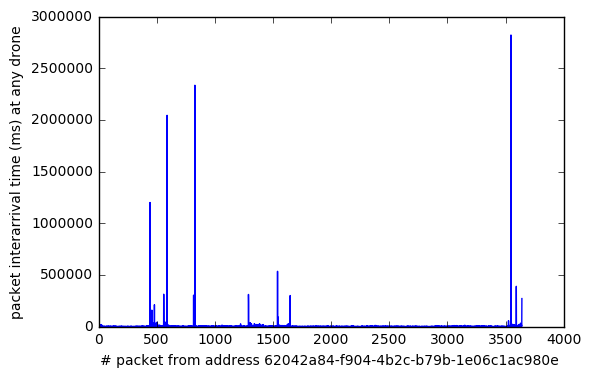

In [10]:
#drawing the delays of some non-randomized address
import matplotlib.pyplot as plt
plt.plot(delays112['62042a84-f904-4b2c-b79b-1e06c1ac980e'])
#plt.plot(delays['e1deda99-163f-4b68-9ade-e1f05d070bf2'])
plt.plot()
plt.ylabel('packet interarrival time (ms) at any drone')
plt.xlabel('# packet from address 62042a84-f904-4b2c-b79b-1e06c1ac980e ')
#axes.set_ylim([0,200])
axes = plt.gca()

plt.show()

[800, 44199, 31, 44966, 23, 721, 44255, 25, 19, 679, 44276, 23, 462, 44512, 737, 44261, 23, 447, 214, 44314, 24, 666]


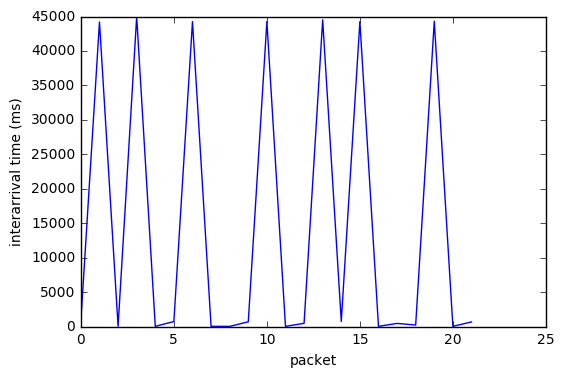

In [11]:
#drawing the delays of some randomized address
import matplotlib.pyplot as plt
plt.plot(delays112['7a43a795-b538-4563-b702-6f0256588479'])
plt.ylabel('interarrival time (ms)')
plt.xlabel('packet')
#axes.set_ylim([0,200])
axes = plt.gca()
print(delays112['7a43a795-b538-4563-b702-6f0256588479'])
plt.show()

In [12]:
print(delays112['443200e5-5752-4e5e-92f4-00af19a293be'])#a randomized address


[144882, 1390, 109, 1907, 453, 116, 562, 133927, 1666, 5170, 1128, 1028, 228, 111, 188, 374, 150, 522, 335, 714, 1534, 4045, 779, 901, 558, 905, 105, 1569, 92, 1263, 1229, 121, 1000, 450, 125, 1607, 402, 339, 328, 234, 230, 574279, 18344, 179882, 100, 1064, 3343, 680, 165, 279, 1690, 1008, 1122, 106, 347, 109, 82, 483, 446, 449, 3594, 1007, 3261, 170, 523, 204, 3466, 2611, 9, 1894, 1792, 1017, 551, 25915, 1048, 20, 503, 402, 2218, 935, 1685, 2038, 1336, 1340, 3036, 4160, 130, 19, 1046, 959, 2129, 449, 560, 97, 10, 1023, 1345, 113, 113, 17, 432, 2133, 1119, 3, 788, 677, 343, 213, 2179416, 226, 209, 685, 3027, 5731, 3469, 348, 565, 1124, 60, 724, 736, 48, 8, 56, 1194, 93, 562, 112, 669, 2025, 1911, 678, 103, 3040, 422, 17451, 903, 2698, 336, 114, 6852, 1117, 1014, 448, 451, 673, 682, 779, 2459, 579, 783, 794, 113, 107, 576, 208, 842, 395, 104, 25, 523, 14]


In [13]:
arr = np.array(delays112['32bf72d3-d707-4c37-b9b5-6318187de63f'])

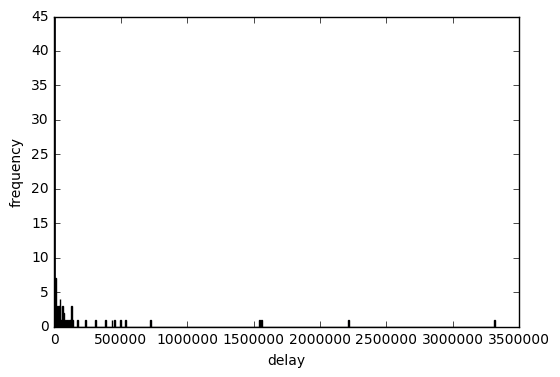

In [14]:
plt.hist(arr, bins = 500)
plt.ylabel('frequency')
plt.xlabel('delay')
axes.set_xlim([0,200000])

axes = plt.gca()

plt.show()

In [15]:
def plotHistogramOfDictionary(dictionary, xlabel, ylabel, nbins):
    dictionaryList = []
    for address in dictionary.keys():
        dictionaryList.append(dictionary[address])
    dictArray = np.array(dictionaryList)
    plt.hist(dictArray, bins = nbins)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    plt.show()

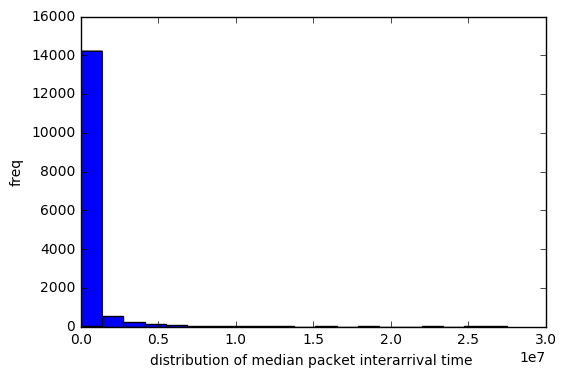

In [16]:
plotHistogramOfDictionary(medianDelay0_112,  'distribution of median packet interarrival time ', 'freq', 20 )

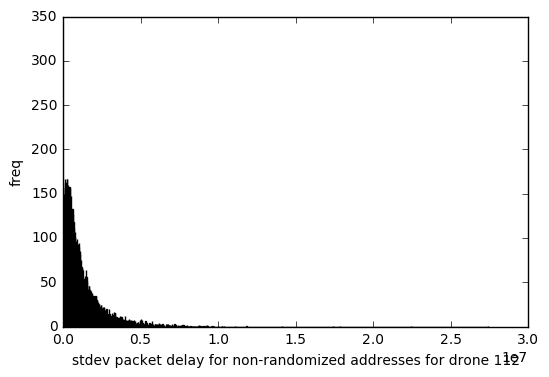

In [17]:
plotHistogramOfDictionary(stderrDelay0_112, 'stdev packet delay for non-randomized addresses for drone 112', 'freq', 2000 )

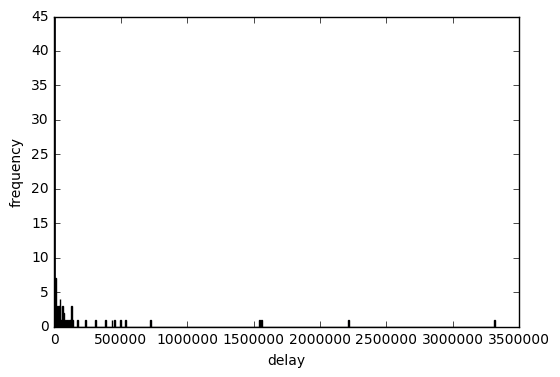

In [18]:
plt.hist(arr, bins = 500)
plt.ylabel('frequency')
plt.xlabel('delay')
axes.set_xlim([0,200000])

axes = plt.gca()

plt.show()

In [19]:
#let us check the stability of the signal strengths
# line: ['32bf72d3-d707-4c37-b9b5-6318187de63f', 0, 1436047299132, '107', -68]
# line: [address, localmac, time, drone, signal]
def GetSignalStrengthPerDroneForAddress(address):
    signalsDictionary = dict()
    for line in json_lines_raw: 
        mac = line[0]
        time = line[2]
        drone = line[3]
        signal = line[4]
        if mac == address:            
            pair=[time, signal]
            if drone not in signalsDictionary.keys():
                signalsDictionary[drone] = []                
            signalsDictionary[drone].append(pair)
    return signalsDictionary
    


In [20]:
signalsDict = GetSignalStrengthPerDroneForAddress('e1deda99-163f-4b68-9ade-e1f05d070bf2')
print(len(signalsDict))
print (signalsDict['112'])

23
[[1436047302165, -64], [1436047302139, -65], [1436047307976, -64], [1436047307853, -64], [1436047317232, -67], [1436047327862, -63], [1436047337864, -64], [1436047337869, -64], [1436047337984, -64], [1436047337861, -66], [1436047337868, -63], [1436047337983, -65], [1436047337985, -65], [1436047347147, -64], [1436047357877, -62], [1436047357876, -62], [1436047357994, -63], [1436047361911, -65], [1436047362307, -62], [1436047362278, -63], [1436047367870, -63], [1436047367882, -65], [1436047367883, -62], [1436047377416, -65], [1436047387878, -64], [1436047387879, -64], [1436047387879, -64], [1436047387997, -63], [1436047397877, -65], [1436047406936, -66], [1436047406934, -64], [1436047407542, -65], [1436047417883, -61], [1436047417886, -64], [1436047418116, -70], [1436047417885, -63], [1436047417886, -66], [1436047421936, -61], [1436047427888, -63], [1436047428778, -65], [1436047437845, -62], [1436047437853, -63], [1436047447900, -64], [1436047447897, -63], [1436047452626, -61], [14360

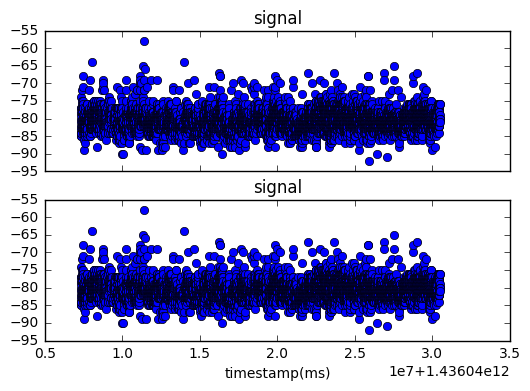

In [21]:
#drawing signal strengths for drone 126 and address e1deda99-163f-4b68-9ade-e1f05d070bf2
import numpy as np
import matplotlib.pyplot as plt

pairs = signalsDict['126']
xx = []
yy=[]
for pair in pairs:
    xx.append(pair[0])
    yy.append(pair[1])
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(xx, yy, yerr=0, fmt='o')
ax0.set_title('signal')
plt.xlabel('timestamp(ms)')

ax1.errorbar(xx, yy, yerr=0, fmt='o')
ax1.set_title('signal')

plt.show()